In [1]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors
import pandas as pd
from fix_grid import fix_grid 

In [78]:
###filter out different regions
###let's start with the solubility effect

In [2]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
co2o2=xr.open_dataset(pathf+'3x3box_corr_monthly_co2-o2_0181-0190_noice.nc', chunks='auto')
corr_ctrl=xr.open_dataset(pathf+'3x3box_corr_monthly_0181-0190_noice.nc', chunks='auto')
corr_cc=xr.open_dataset(pathf+'3x3box_corr_monthly_1PctTo2X_0181-0190_noice.nc', chunks='auto')
co2o2=fix_grid(co2o2)
corr_ctrl=fix_grid(corr_ctrl)
corr_cc=fix_grid(corr_cc)

In [7]:
##bedingungen für solubility ist FO2/FCO2 positiv, SST/F(C)O2 negative

In [4]:
filter1=co2o2.corr_o2_stf_dic_stf_ctrl.where(co2o2.corr_o2_stf_dic_stf_ctrl>0).where(corr_ctrl.corr_sst_o2_stf<0).where(corr_ctrl.corr_sst_dic_stf<0)

In [5]:
filter1_cc=co2o2.corr_o2_stf_dic_stf_1PctTo2X.where(co2o2.corr_o2_stf_dic_stf_1PctTo2X>0)..where(corr_cc.corr_sst_o2_stf<0).where(corr_cc.corr_sst_dic_stf<0)

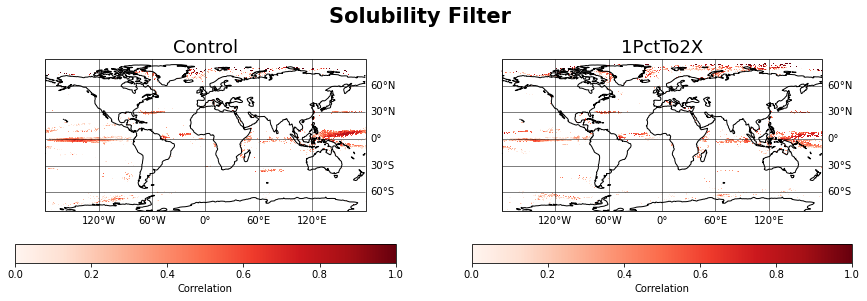

In [7]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
filter1.plot(ax=axs[0],vmin=0, vmax=1, x='geolon_t', y='geolat_t', cmap='Reds', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
filter1_cc.plot(ax=axs[1], vmin=0, vmax=1, x='geolon_t', y='geolat_t', cmap='Reds', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Solubility Filter', fontweight='bold', fontsize=21, y=1.06);
#plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');

In [27]:
### Kategorie 2 Prototyp
###biologie und upwelling
##bedingungen: FO2/FCO2 negativ
#bio: FCO2/jp_uptake positiv
#upwelling: MLDA/FCO2 positiv, MLDA/FO2 negativ
--> Vorzeichen aber nochmal checken

In [70]:
filter1=co2o2.corr_o2_stf_dic_stf_ctrl.where(co2o2.corr_o2_stf_dic_stf_ctrl<0)
filter2=filter1.where(corr_ctrl.corr_sst_o2_stf>0).where(corr_ctrl.corr_sst_dic_stf<0)

filter1_cc=co2o2.corr_o2_stf_dic_stf_1PctTo2X.where(co2o2.corr_o2_stf_dic_stf_1PctTo2X<0)
filter2_cc=filter1_cc.where(corr_cc.corr_sst_o2_stf>0).where(corr_cc.corr_sst_dic_stf<0)

filter2_cc=fix_grid(filter2_cc)
filter2=fix_grid(filter2)

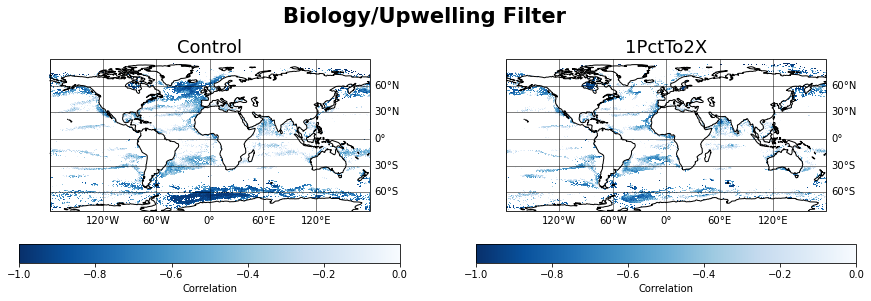

In [71]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
filter2.plot(ax=axs[0],vmin=-1, vmax=0, x='geolon_t', y='geolat_t', cmap='Blues_r', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
filter2_cc.plot(ax=axs[1], vmin=-1, vmax=0, x='geolon_t', y='geolat_t', cmap='Blues_r', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Biology/Upwelling Filter', fontweight='bold', fontsize=21, y=1.06);
#plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');

In [72]:
test=xr.concat((filter1,filter2),'z').mean(dim='z')
test_cc=xr.concat((filter1_cc,filter2_cc),'z').mean(dim='z')

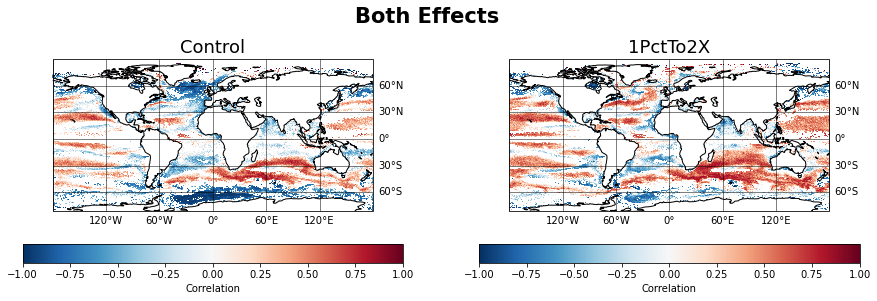

In [73]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
test.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='RdBu_r', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
test_cc.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='RdBu_r', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})

#filter21.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='RdBu_r', transform = ccrs.PlateCarree(), add_colorbar=False)
#filter2_cc1.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='RdBu_r', transform = ccrs.PlateCarree(), add_colorbar=False)


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Both Effects', fontweight='bold', fontsize=21, y=1.06);
#plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');

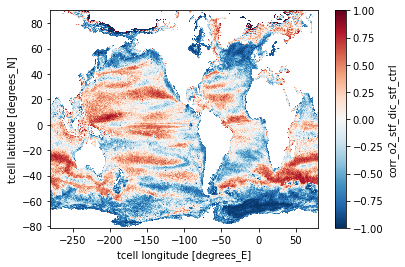

In [91]:
co2o2=fix_grid(co2o2)
co2o2.corr_o2_stf_dic_stf_ctrl.plot()

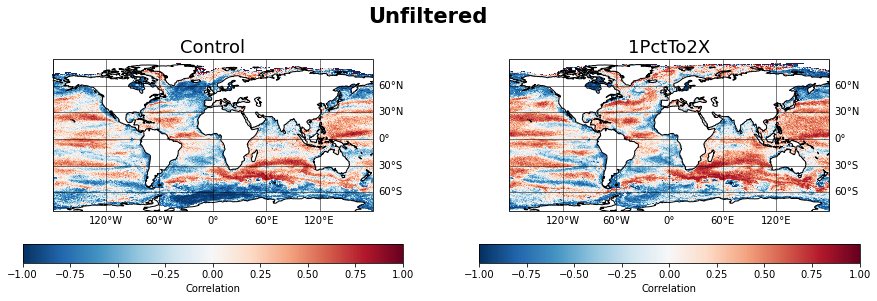

In [92]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
co2o2.corr_o2_stf_dic_stf_ctrl.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='RdBu_r', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
co2o2.corr_o2_stf_dic_stf_1PctTo2X.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap='RdBu_r', transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})

for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Unfiltered', fontweight='bold', fontsize=21, y=1.06);
#plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');